# Osciladores


## Librerias

In [1]:
!pip install SciencePlots -q

In [2]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scienceplots
from IPython.display import HTML


# Estilo
plt.style.use(['seaborn', 'science', 'nature','no-latex'])
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

<ipython-input-2-cc72196cd1c2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn', 'science', 'nature','no-latex'])


> ## Oscilador Simple

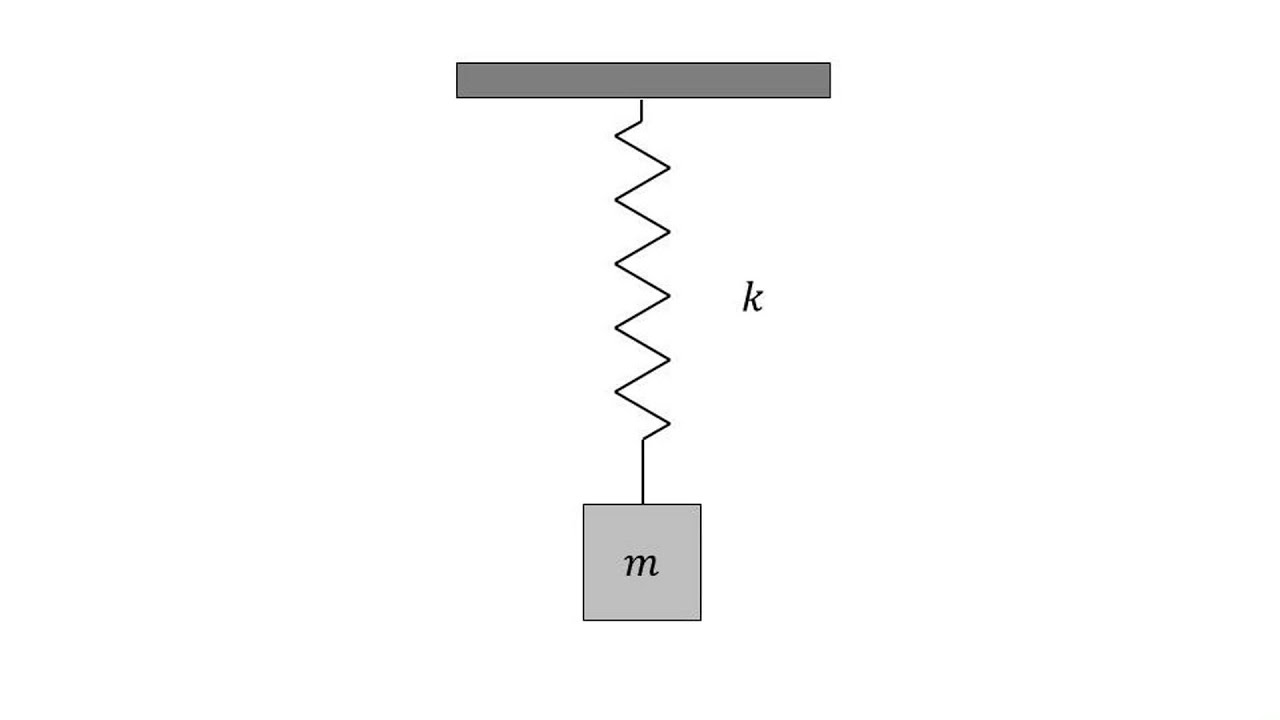

Para el oscilador simple la ecuación diferencial es la siguiente:

$$
\ddot{x} + \frac{k}{m} x = 0
$$

y para poder resolverla, bajamos el orden de la ecuación
$$
\begin{align*}
v &= \dot{x} \\
\dot{v} &= - \frac{k}{m} x
\end{align*}
$$

In [22]:
def dvdt(t, y0, k, m):
    x0, v0 = y0
    return [v0, -(k/m)*x0]

# Condiciones y constantes
m = 1
k = 1
y0 = [1, 0]
t = np.arange(0, 30, 1e-3)

# Resolver
sol = solve_ivp(dvdt, (0, 30), y0, t_eval=t, args=(k, m))
solu = sol.y

### Graficas

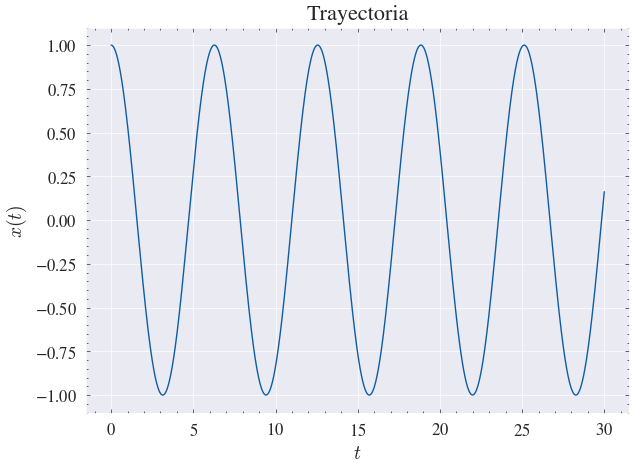

In [23]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[0], label=r'$x(t)$')
plt.title("Trayectoria", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$x(t)$', fontsize=14)
plt.savefig('x_simple.pdf', bbox_inches="tight")
plt.show()

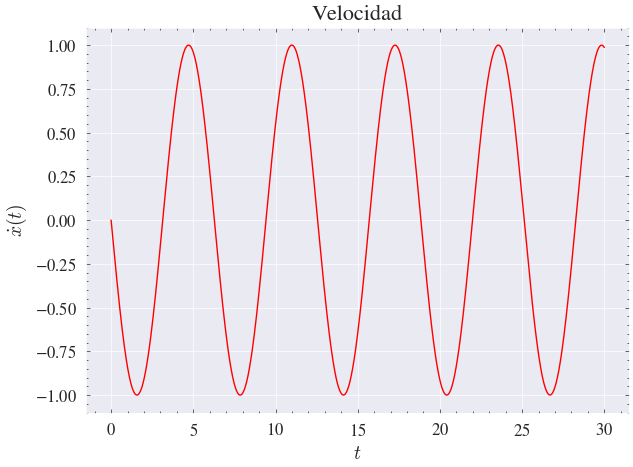

In [24]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[1], label=r'$\dot{x}(t)$', color='r')
plt.title("Velocidad", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\dot{x}(t)$', fontsize=14)
plt.savefig('v_simple.pdf', bbox_inches="tight")
plt.show()

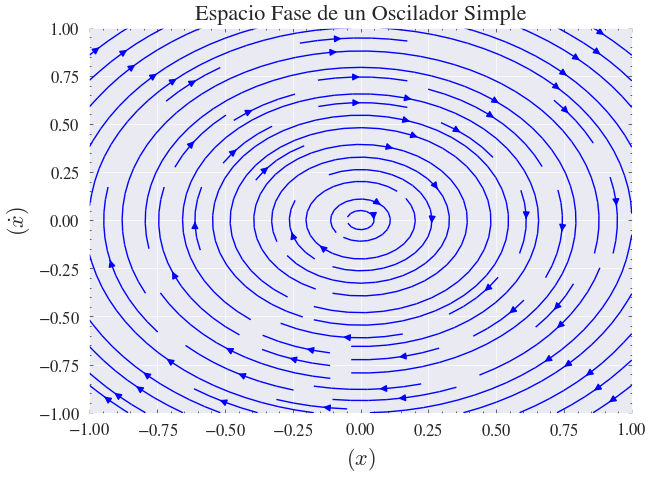

In [25]:
# Trayectoria
# Extraer las soluciones para x y v
x, v = solu

# Crear una cuadrícula de valores para x y v
x_grid, v_grid = np.meshgrid(np.linspace(min(x), max(x), 20), np.linspace(min(v), max(v), 20))

# Calcular las derivadas en cada punto de la cuadrícula
dxdt, dvdt_ = dvdt(0, [x_grid, v_grid], k, m)

# Graficar el espacio fase con streamplot
plt.figure(figsize=(7,5))
plt.streamplot(x_grid, v_grid, dxdt, dvdt_, density=1, color='b')
plt.xlabel('$(x)$', fontsize=16)
plt.ylabel('$(\dot{x})$', fontsize=16)
plt.title('Espacio Fase de un Oscilador Simple',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_simple.pdf', bbox_inches="tight")
plt.show()

> ## Oscilador forzado

La ecuación para el oscilador forzado es la siguiente:

$$
\ddot{x} = -\frac{k}{m}x - \frac{b}{m}\dot{x} + \frac{F_0}{m}\sin(\omega t)
$$
pero al bajar el orden obtenemos lo siguiente

$$
\begin{align*}
\dot{x} &= v\\
\ddot{x} &= -\frac{k}{m}x - \frac{b}{m}\dot{x} + \frac{F_0}{m} \sin(\omega t)\\
\end{align*}
$$

In [15]:
def dvdt(t, y0, k, b, m, F0, w):
    x0, v0 = y0
    return [v0, -(k/m)*x0 - (b/m)*v0 + (F0/m) * np.sin(w*t)]

# Condiciones y constantes
m = 1
k = 1
b = 1
F0 = 1
w = np.pi
y0 = [1, 0]
t = np.arange(0, 30, 1e-3)

# Resolver
sol = solve_ivp(dvdt, (0, 30), y0, t_eval=t, args=(k, b, m, F0, w))
solu = sol.y

### Graficas

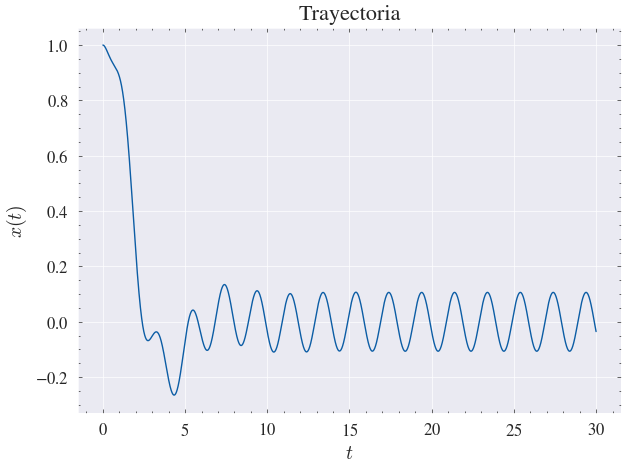

In [10]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[0], label=r'$x(t)$')
plt.title("Trayectoria", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$x(t)$', fontsize=14)
plt.savefig('x_forzado.pdf', bbox_inches="tight")
plt.show()

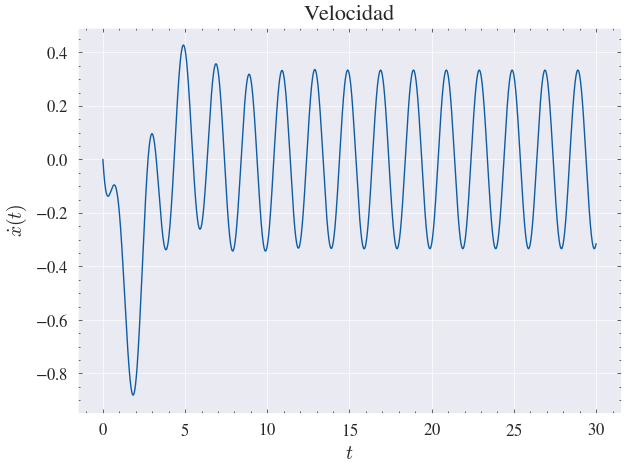

In [5]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[1])
plt.title("Velocidad", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\dot{x}(t)$', fontsize=14)
plt.savefig('v_forzado.pdf', bbox_inches="tight")
plt.show()

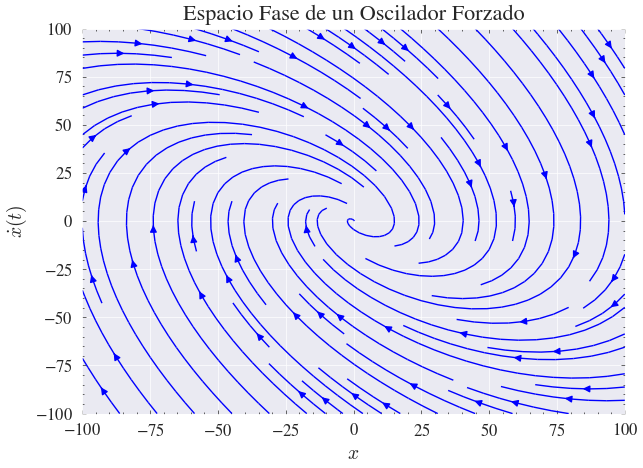

In [17]:
# Trayectoria
# Extraer las soluciones para x y v
x, v = solu

# Crear una cuadrícula de valores para x y v
x_grid, v_grid = np.meshgrid(np.linspace(-100, 100, 20), np.linspace(-100, 100, 20))

# Calcular las derivadas en cada punto de la cuadrícula
dxdt, dvdt_ = dvdt(1, [x_grid, v_grid], k, b, m, F0, w)

# Graficar el espacio fase con streamplot
plt.figure(figsize=(7,5))
plt.streamplot(x_grid, v_grid, dxdt, dvdt_, density=1, color='b')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$\dot{x}$', fontsize=16)
plt.title('Espacio Fase de un Oscilador Forzado',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$\dot{x}(t)$', fontsize=14)
plt.savefig('fase_forzado.pdf', bbox_inches="tight")
plt.show()

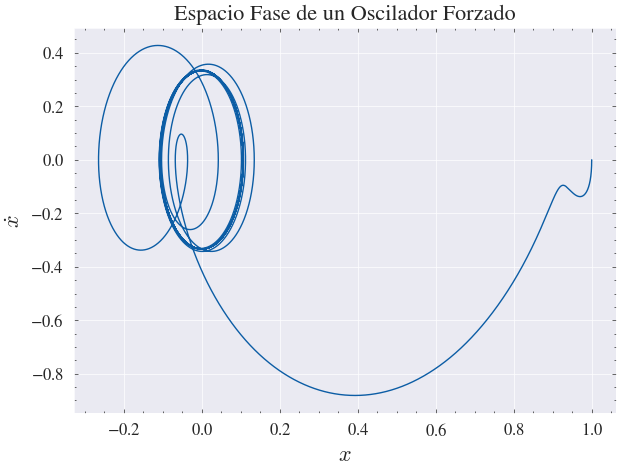

In [13]:
# Extraer las soluciones para x y v
x,  v = solu

# Graficar el espacio fase con streamplot
plt.figure(figsize=(7,5))
plt.plot(x,v)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$\dot{x}$', fontsize=16)
plt.title('Espacio Fase de un Oscilador Forzado',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_forzado2.pdf', bbox_inches="tight")
plt.show()

In [201]:
tf = 30
t = np.linspace(0, tf, tf*25)

# Condiciones y constantes
m = 1
k = 1
b = 1
F0 = 1
w = 2*np.pi
y0 = [1, 0]

# Resolver
sol = solve_ivp(dvdt, (0, 30), y0, t_eval=t, args=(k, b, m, F0, w))
solu = sol.y

x, v = solu

fig, ax = plt.subplots(figsize=(10, 10))
max_length = max(x)
ax.set_xlim(-max_length, max_length)
ax.set_ylim(-2, 2)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_title('Oscilador Forzado', fontsize=16)
line, = ax.plot([], [], 'o-', lw=2, label=f'k={k}, m={m}', markersize=10)
# path = ax.scatter(x[0], 0, c='k', alpha=0.2)
ax.legend(fontsize=15)

def animate(i):
    line.set_data([0, x[i]], [0, 0])
    # path.set_offsets(np.c_[x1[:i], 0])
    # if len(path.get_offsets()) > 100:
    #     path.set_offsets(path.get_offsets()[1:])
    return line,

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1000/25, blit=True)
# anim.save('springed_pendulum.gif', fps=25)
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.

> ## Oscilador amortiguado

La ecuación para el oscilador amortiguado es la siguiente:

$$
\ddot{x} = -\frac{k}{m}x - \frac{b}{m}\dot{x}
$$
pero al bajar el orden obtenemos lo siguiente

$$
\begin{align*}
\dot{x} &= v\\
\ddot{x} &= -\frac{k}{m}x - \frac{b}{m}\dot{x}
\end{align*}
$$

In [257]:
def dvdt(t, y0, k, b, m):
    x0, v0= y0
    return [v0, -(k/m)*x0 - (b/m)*v0]

# Condiciones y constantes
m = 1
k = 1
b = 0.2
y0 = [1, 0]
t = np.arange(0, 30, 1e-3)

# Resolver
sol = solve_ivp(dvdt, (0, 30), y0, t_eval=t, args=(k, b, m))
solu = sol.y

### Gráficas

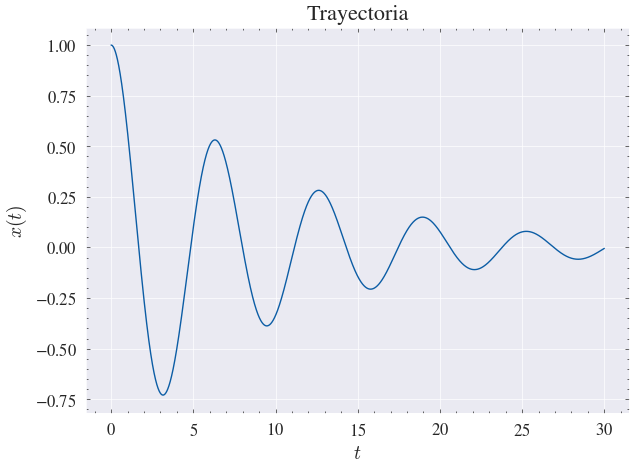

In [258]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[0], label=r'$x(t)$')
plt.title("Trayectoria", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$x(t)$', fontsize=14)
plt.savefig('x_amortiguado.pdf', bbox_inches="tight")
plt.show()

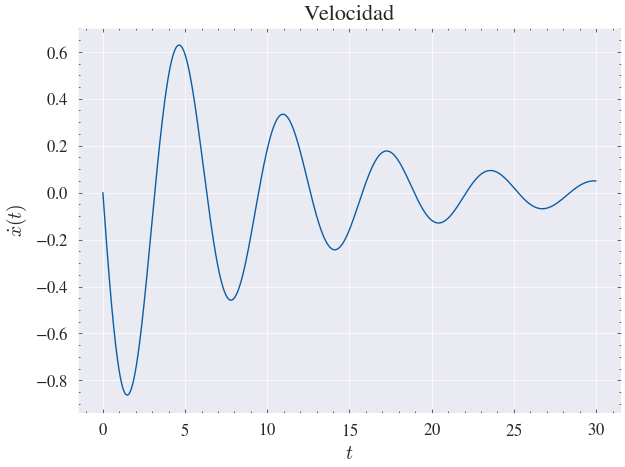

In [259]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[1], label=r'$x(t)$')
plt.title("Velocidad", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\dot{x}(t)$', fontsize=14)
plt.savefig('v_amortiguado.pdf', bbox_inches="tight")
plt.show()

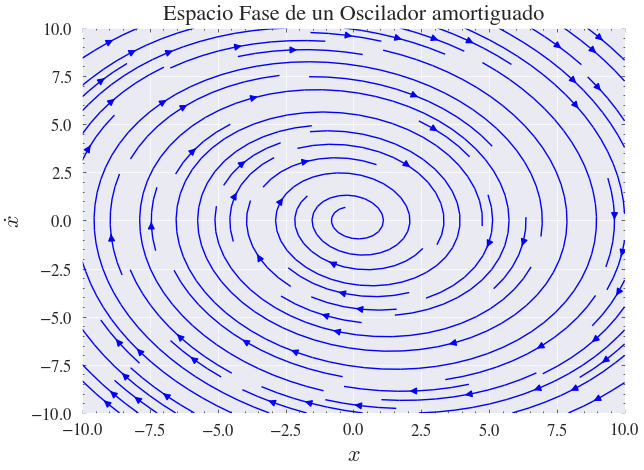

In [260]:
# Trayectoria
# Extraer las soluciones para x y v
# Resolver
sol = solve_ivp(dvdt, (0, 30), y0, t_eval=t, args=(k, 0.7, m))
solu = sol.y
x, v = solu

# Crear una cuadrícula de valores para x y v
x_grid, v_grid = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

# Calcular las derivadas en cada punto de la cuadrícula
dxdt, dvdt_ = dvdt(0, [x_grid, v_grid], k, b, m)

# Graficar el espacio fase con streamplot
plt.figure(figsize=(7,5))
plt.streamplot(x_grid, v_grid, dxdt, dvdt_, density=1, color='b')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$\dot{x}$', fontsize=16)
plt.title('Espacio Fase de un Oscilador amortiguado',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_amortiguado.pdf', bbox_inches="tight")
plt.show()

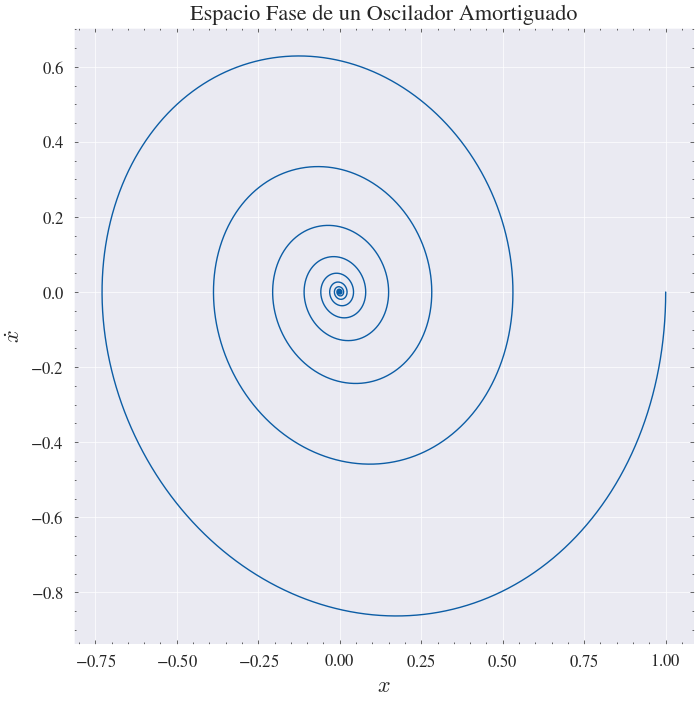

In [262]:
# Trayectoria
t = np.arange(0, 100, 1e-3)
sol = solve_ivp(dvdt, (0, 100), y0, t_eval=t, args=(k, 0.2, m))
solu = sol.y

# Extraer las soluciones para x y v
x,  v = solu

# Graficar el espacio fase con streamplot
plt.figure(figsize=(8,8))
plt.plot(x,v)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$\dot{x}$', fontsize=16)
plt.title('Espacio Fase de un Oscilador Amortiguado',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_amortiguado2.pdf', bbox_inches="tight")
plt.show()

 > ## Péndulo Físico

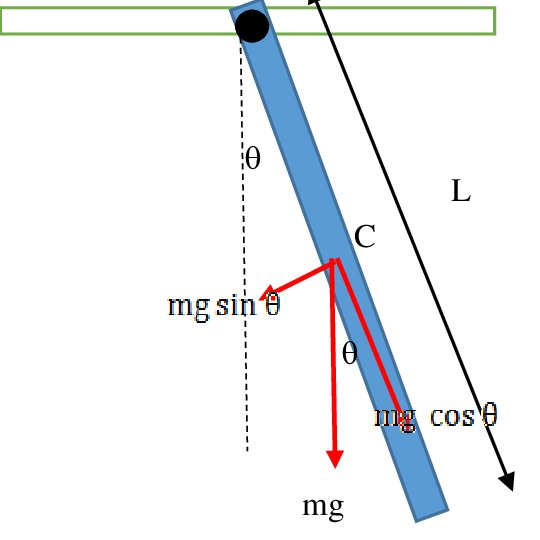

La ecuación de movimiento para el péndulo físico es la siguiente:

$$
\ddot{\theta} = - \frac{m}{I} gl \sin \theta
$$

y al bajar el orden de las ecuaciones
$$
\begin{align*}
\dot{\theta} &= \omega \\
\dot{\omega} &= -\frac{m}{I}gl\sin\theta
\end{align*}
$$

y si consideramos un cilindro que su eje de giro es uno de sus extremos

$$
I = \frac{1}{3} m l^2
$$
entonces
$$
\begin{align*}
\dot{\theta} &= \omega \\
\dot{\omega} &= -3\frac{g}{l}\sin\theta
\end{align*}
$$

In [18]:
def dwdt(t, y0, g, l):
    t0, w0 = y0
    return [w0, -3 * (g/l) * np.sin(t0)]

# Condiciones y constantes
l = 1
g = 1
y0 = [np.deg2rad(45), 0]
t = np.arange(0, 10, 1e-3)

# Resolver
sol = solve_ivp(dwdt, (0, 10), y0, t_eval=t, args=(g, l))
solu = sol.y

### Gráficas

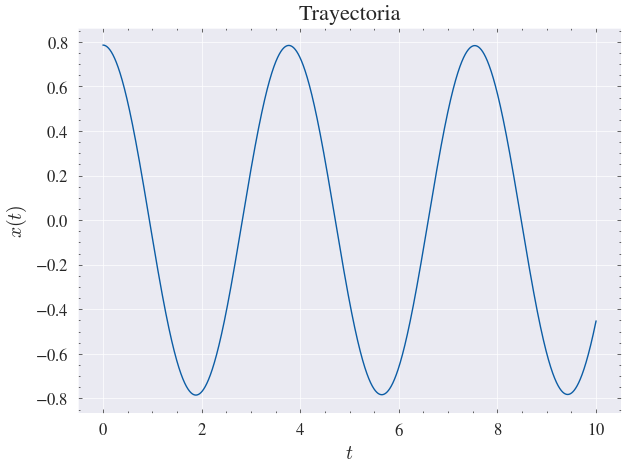

In [19]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[0], label=r'$x(t)$')
plt.title("Trayectoria", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$x(t)$', fontsize=14)
plt.savefig('x_fisico.pdf', bbox_inches="tight")
plt.show()

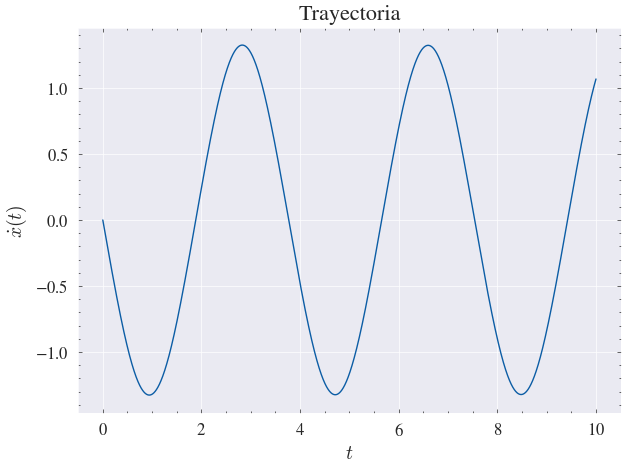

In [20]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[1], label=r'$x(t)$')
plt.title("Trayectoria", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\dot{x}(t)$', fontsize=14)
plt.savefig('v_fisico.pdf', bbox_inches="tight")
plt.show()

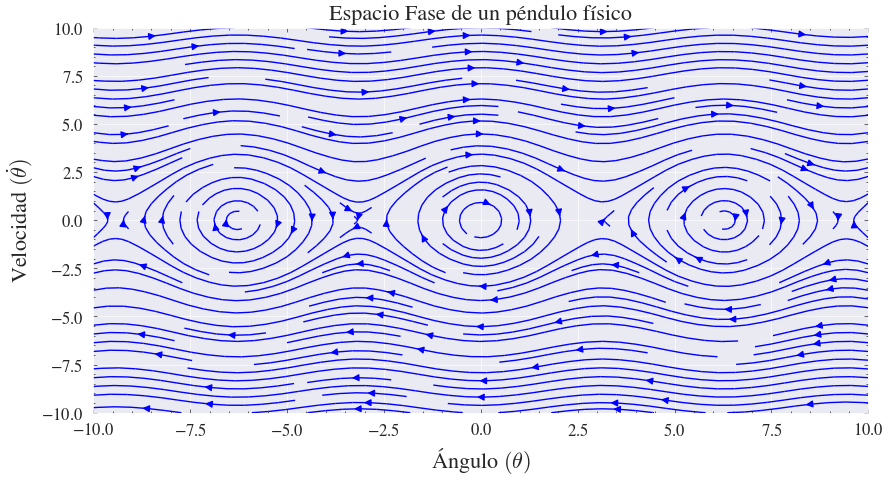

In [21]:
# Espacio fase

# Crear una cuadrícula de valores para x y v
x_grid, v_grid = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

# Calcular las derivadas en cada punto de la cuadrícula
dtdt, dwdt_ = dwdt(0, [x_grid, v_grid], g, l)

# Graficar el espacio fase con streamplot
plt.figure(figsize=(10,5))
plt.streamplot(x_grid, v_grid, dtdt, dwdt_, density=1.5, color='b')
plt.xlabel(r'Ángulo $(\theta)$', fontsize=16)
plt.ylabel(r'Velocidad $(\dot{\theta})$', fontsize=16)
plt.title('Espacio Fase de un péndulo físico',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_fisico.pdf', bbox_inches="tight")
plt.show()

Text(0.5, 1.0, 'Espacio Fase de un Oscilador Amortiguado')

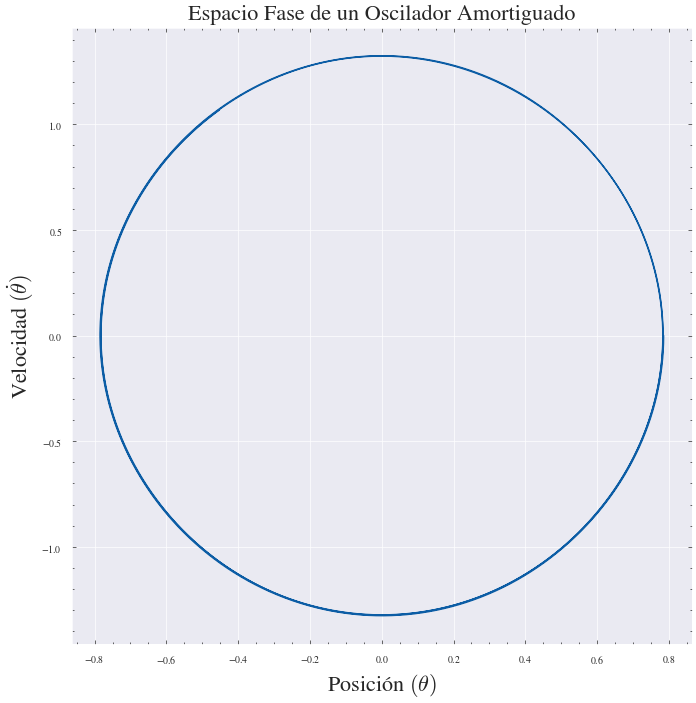

In [118]:
# Espacio fase de las condiciones dadas
# Extraer las soluciones para x y v
x, v = solu

# Graficar el espacio fase con streamplot
plt.figure(figsize=(8,8))
plt.plot(x,v)
plt.xlabel(r'Posición $(\theta)$', fontsize=16)
plt.ylabel(r'Velocidad $(\dot{\theta})$', fontsize=16)
plt.title('Espacio Fase de un Oscilador Amortiguado',fontsize=16)

> ## Oscilador acoplado a un péndulo

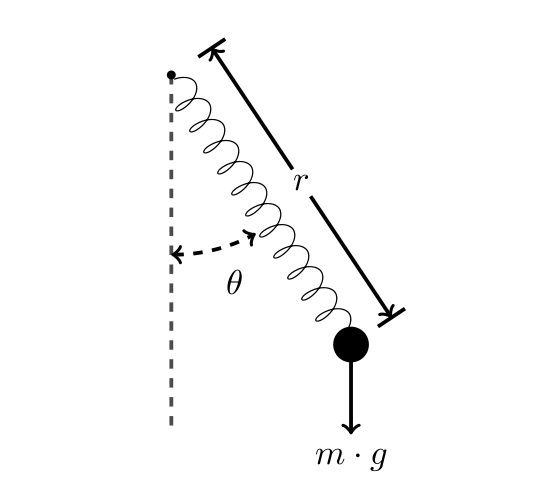

Las ecuaciones del oscilador acoplado a un péndulo son las siguientes:

$$
\begin{align*}
\ddot{x} &= (l_0 + x)\dot{\theta}^2 - \frac{k}{m} x+ g\cos\theta\\
\ddot{\theta} &= -\frac{g}{l_0+x}\sin\theta - \frac{2\dot{x}}{l_0+x}\dot\theta
\end{align*}
$$

y al bajar el orden del sistemas de ecuaciones diferenciales:

$$
\begin{align*}
\dot{x} &= v \\
\dot{\theta} &= \omega \\
\ddot{x} &= (l_0 + x)\omega^2 - \frac{k}{m} x+ g\cos\theta\\
\ddot{\theta} &= -\frac{g}{l_0+x}\sin\theta - \frac{2v}{l_0+x}\omega
\end{align*}
$$

In [228]:
def dSdt(t, y0, l0, k, m, g):
    x0, v0, theta0, w0 = y0
    return [
        v0,
        x0 * w0**2 + (k/m) * (l0 - x0) + g * np.cos(theta0),
        w0,
        - (g/(x0)) * np.sin(theta0) - ((2*v0)/x0) * w0,
    ]

# Condiciones y constantes
m = 1
k = 20
g = 9.81
l0 = 1
y0 = [0.7, 0, np.deg2rad(89), 0]
t = np.arange(0, 30, 1e-3)

# Resolver
sol = solve_ivp(dSdt, (0, 30), y0, t_eval=t, args=(l0, k, m, g))
solu = sol.y

### Gráficas

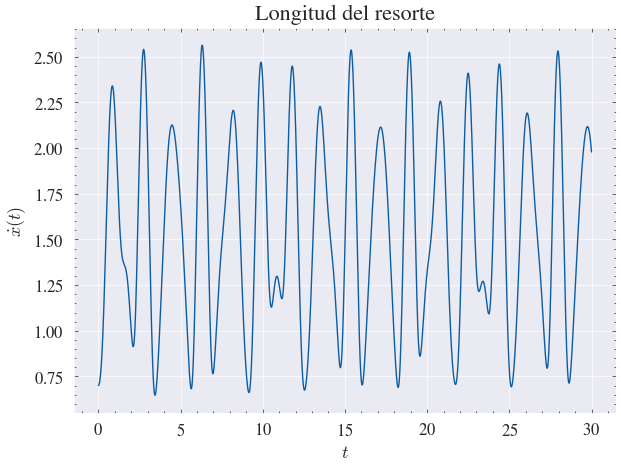

In [240]:
# Trayectoria
plt.figure(figsize=(7,5))
plt.plot(t, solu[0], label=r'$x(t)$')
plt.title("Longitud del resorte", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$t$", fontsize=13)
plt.ylabel(r"$\dot{x}(t)$", fontsize=13)
plt.savefig('x_acoplado.pdf', bbox_inches="tight")
plt.show()

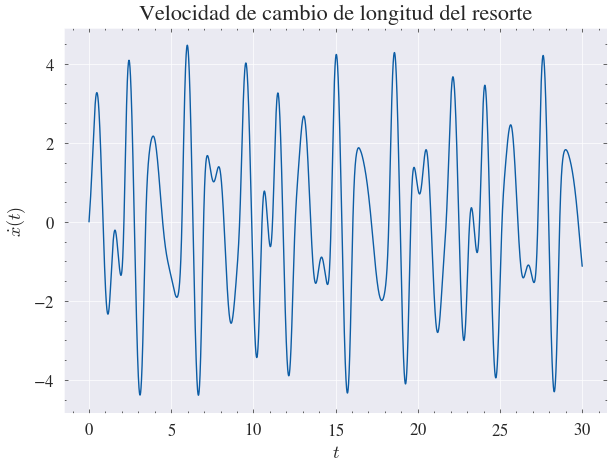

In [241]:
# Velocidad
plt.figure(figsize=(7,5))
plt.plot(t, solu[1], label=r'$x(t)$')
plt.title("Velocidad de cambio de longitud del resorte", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$t$", fontsize=13)
plt.ylabel(r"$\dot{x}(t)$", fontsize=13)
plt.savefig('v_acoplado.pdf', bbox_inches="tight")
plt.show()

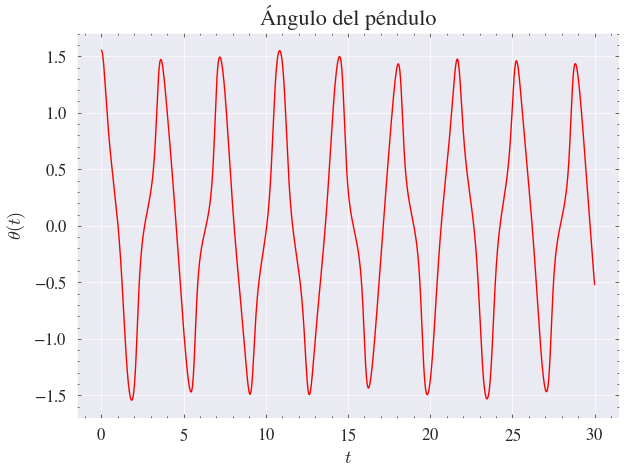

In [242]:
# Velocidad
plt.figure(figsize=(7,5))
plt.plot(t, solu[2], label=r'$x(t)$', color='r')
plt.title("Ángulo del péndulo", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$t$", fontsize=13)
plt.ylabel(r"$\theta(t)$", fontsize=13)
plt.savefig('theta_acoplado.pdf', bbox_inches="tight")
plt.show()

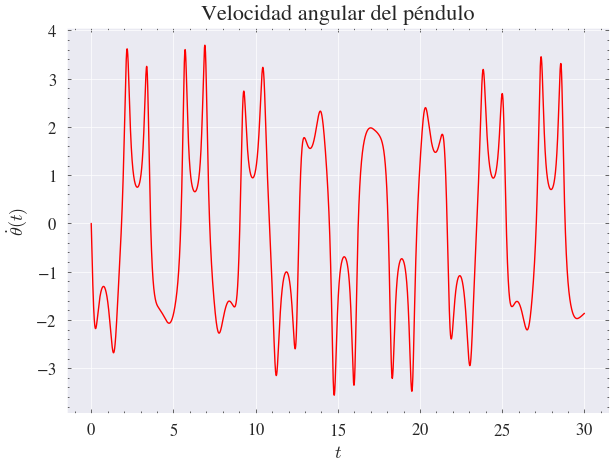

In [243]:
# Velocidad
plt.figure(figsize=(7,5))
plt.plot(t, solu[3], label=r'$x(t)$', color='r')
plt.title("Velocidad angular del péndulo", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r"$t$", fontsize=13)
plt.ylabel(r"$\dot{\theta}(t)$", fontsize=13)
plt.savefig('w_acoplado.pdf', bbox_inches="tight")
plt.show()

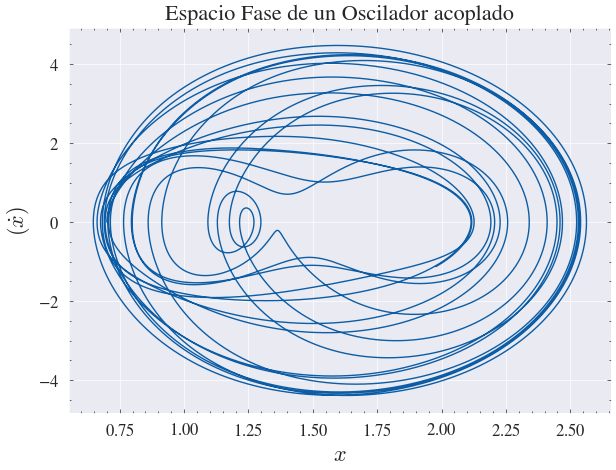

In [244]:
# Trayectoria
# Extraer las soluciones para x y v
x, v, theta, w = solu

# Graficar el espacio fase con streamplot
plt.figure(figsize=(7,5))
plt.plot(x, v)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$(\dot{x})$', fontsize=16)
plt.title('Espacio Fase de un Oscilador acoplado',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_x_acoplado.pdf', bbox_inches="tight")
plt.show()

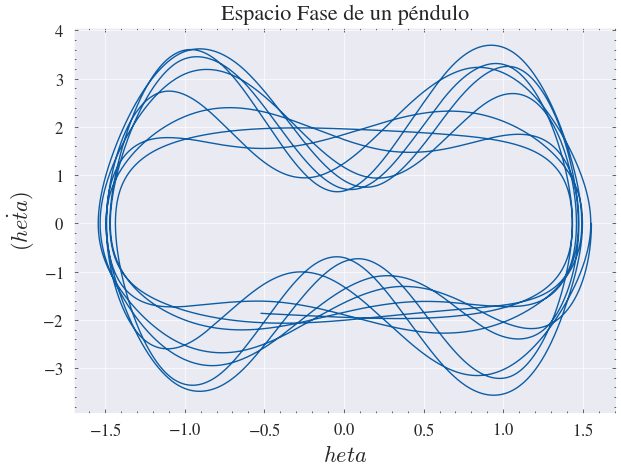

In [245]:
# Graficar el espacio fase con streamplot
plt.figure(figsize=(7,5))
plt.plot(theta, w)
plt.xlabel('$\theta$', fontsize=16)
plt.ylabel('$(\dot{\theta})$', fontsize=16)
plt.title('Espacio Fase de un péndulo',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('fase_theta_acoplado.pdf', bbox_inches="tight")
plt.show()

In [194]:
def get_x_y(theta, l):
    x = l * np.sin(theta)
    y = -l * np.cos(theta)
    return x, y

In [198]:
tf = 30
t = np.linspace(0, tf, tf*25)
k = 20
g = 9.81
m = 1
l0 = 1
y0 = [0.7, 0, np.deg2rad(89), 0]

# Resolver
sol = solve_ivp(dSdt, (0, 30), y0, t_eval=t, args=(l0, k, m, g))
solu = sol.y

x, v, theta, w = solu

x1, y1 = get_x_y(theta, x)

fig, ax = plt.subplots(figsize=(10, 10))
max_length = max(x)
ax.set_xlim(-max_length, max_length)
ax.set_ylim(-max_length, max_length)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
ax.set_title('Springed pendulum', fontsize=16)
line, = ax.plot([], [], 'o-', lw=2, label=f'k={k}, m={m}, l0={l0}', markersize=10)
path = ax.scatter(x1[0], y1[0], c='k', alpha=0.2)
ax.legend(fontsize=15)

def animate(i):
    _x, y = get_x_y(theta[i], x[i])
    line.set_data([0, _x], [0, y])
    path.set_offsets(np.c_[x1[:i], y1[:i]])
    if len(path.get_offsets()) > 100:
        path.set_offsets(path.get_offsets()[1:])
    return line, path

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=1000/25, blit=True)
# anim.save('springed_pendulum.gif', fps=25)
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.